In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('people.jpeg', cv2.IMREAD_GRAYSCALE)

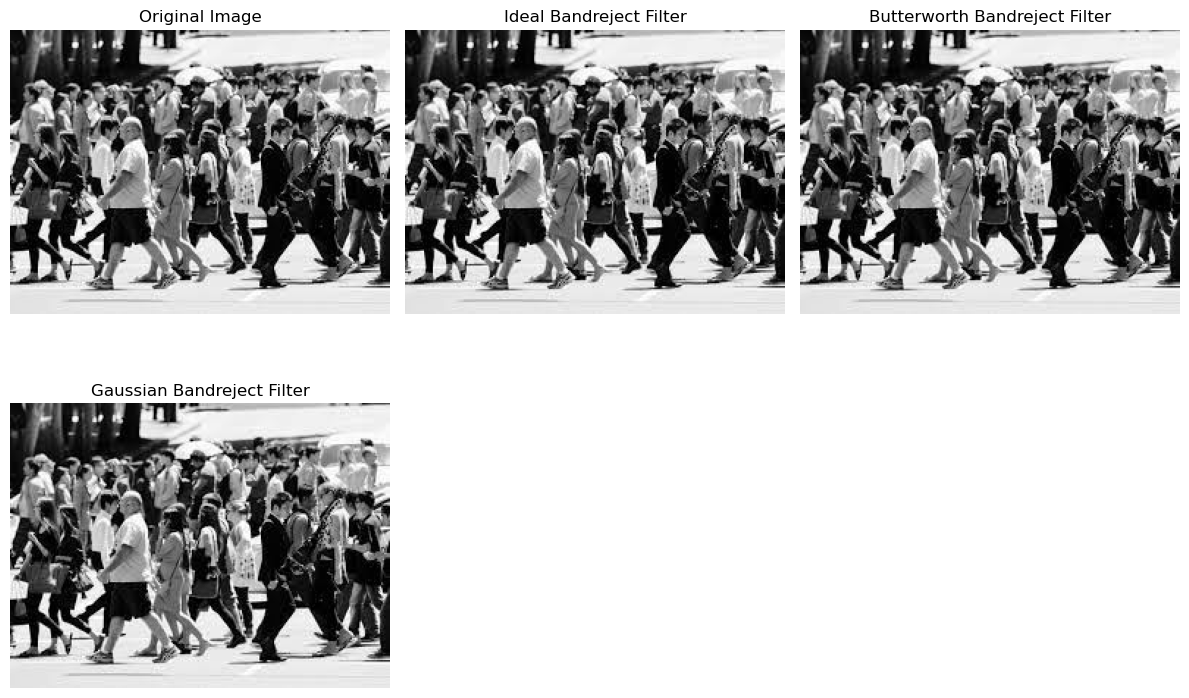

In [11]:
def ideal_bandreject_filter(shape, cutoff_low, cutoff_high, order=2):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    radius = np.sqrt((x ** 2)[np.newaxis] + (y ** 2)[:, np.newaxis])

    filter_ = 1 - (1 / (1 + ((radius ** 2) / (cutoff_high * cutoff_low)) ** order))

    return filter_

def butterworth_bandreject_filter(shape, cutoff_low, cutoff_high, order=2):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    radius = np.sqrt((x ** 2)[np.newaxis] + (y ** 2)[:, np.newaxis])

    filter_ = 1 - 1 / (1 + (radius ** 2 / (cutoff_high * cutoff_low)) ** order)

    return filter_

def gaussian_bandreject_filter(shape, cutoff_low, cutoff_high):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    radius = np.sqrt((x ** 2)[np.newaxis] + (y ** 2)[:, np.newaxis])

    filter_ = 1 - np.exp(-0.5 * ((radius ** 2) / (cutoff_high * cutoff_low)) ** 2)

    return filter_


# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Apply bandreject filters
    ideal_filter = ideal_bandreject_filter(image.shape, 0.1, 0.3)
    butterworth_filter = butterworth_bandreject_filter(image.shape, 0.1, 0.3)
    gaussian_filter = gaussian_bandreject_filter(image.shape, 0.1, 0.3)

    # Perform Fourier transform
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    # Apply filters in the frequency domain
    ideal_filtered = np.abs(np.fft.ifft2(fshift * ideal_filter))
    butterworth_filtered = np.abs(np.fft.ifft2(fshift * butterworth_filter))
    gaussian_filtered = np.abs(np.fft.ifft2(fshift * gaussian_filter))

    # Display the images using Matplotlib
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(ideal_filtered, cmap='gray')
    plt.title('Ideal Bandreject Filter')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(butterworth_filtered, cmap='gray')
    plt.title('Butterworth Bandreject Filter')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(gaussian_filtered, cmap='gray')
    plt.title('Gaussian Bandreject Filter')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


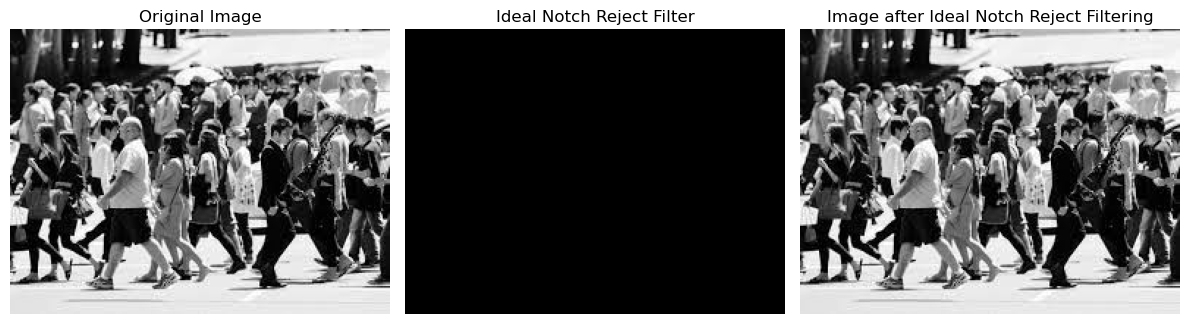

In [12]:

def ideal_notch_reject_filter(shape, center, radius):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    xx, yy = np.meshgrid(x, y)
    filter_ = np.ones((rows, cols))
    distance = np.sqrt((xx - center[0]) ** 2 + (yy - center[1]) ** 2)
    filter_[(distance <= radius)] = 0
    return filter_

def butterworth_notch_reject_filter(shape, center, radius, order=2):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    xx, yy = np.meshgrid(x, y)
    filter_ = np.ones((rows, cols))
    distance = np.sqrt((xx - center[0]) ** 2 + (yy - center[1]) ** 2)
    filter_ = 1 / (1 + ((distance * radius) ** order))
    return filter_

def gaussian_notch_reject_filter(shape, center, radius):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    xx, yy = np.meshgrid(x, y)
    filter_ = np.ones((rows, cols))
    distance = np.sqrt((xx - center[0]) ** 2 + (yy - center[1]) ** 2)
    filter_ = 1 - np.exp(-0.5 * ((distance / radius) ** 2))
    return filter_

def notch_pass_filter(shape, center, radius):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    xx, yy = np.meshgrid(x, y)
    filter_ = np.zeros((rows, cols))
    distance = np.sqrt((xx - center[0]) ** 2 + (yy - center[1]) ** 2)
    filter_[(distance <= radius)] = 1
    return filter_

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Design filters
    shape = image.shape
    center = (shape[0] // 2, shape[1] // 2)
    radius = 30
    ideal_filter = ideal_notch_reject_filter(shape, center, radius)
    butterworth_filter = butterworth_notch_reject_filter(shape, center, radius)
    gaussian_filter = gaussian_notch_reject_filter(shape, center, radius)
    notch_pass = notch_pass_filter(shape, center, radius)

    # Apply filters to the image
    image_ideal = np.fft.ifft2(np.fft.fft2(image) * ideal_filter).real
    image_butterworth = np.fft.ifft2(np.fft.fft2(image) * butterworth_filter).real
    image_gaussian = np.fft.ifft2(np.fft.fft2(image) * gaussian_filter).real
    image_notch_pass = np.fft.ifft2(np.fft.fft2(image) * notch_pass).real

    # Display the images using Matplotlib
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(ideal_filter, cmap='gray')
    plt.title('Ideal Notch Reject Filter')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(image_ideal, cmap='gray')
    plt.title('Image after Ideal Notch Reject Filtering')
    plt.axis('off')

    # Repeat similar subplot code for other filtered images...

    plt.tight_layout()
    plt.show()

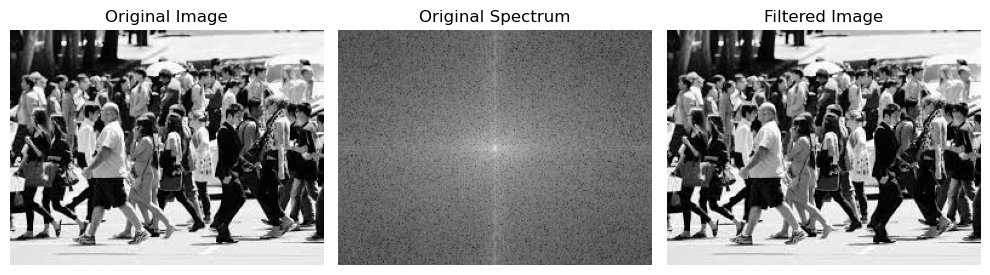

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def notch_reject_filter(shape, center, radius):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols) * cols
    y = np.linspace(-0.5, 0.5, rows) * rows
    xx, yy = np.meshgrid(x, y)
    filter_ = np.ones((rows, cols))
    distance = np.sqrt((xx - center[0]) ** 2 + (yy - center[1]) ** 2)
    filter_[(distance <= radius)] = 0
    return filter_



# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Design a notch reject filter
    shape = image.shape
    center = (shape[0] // 2, shape[1] // 2)
    radius = 30
    notch_filter = notch_reject_filter(shape, center, radius)

    # Apply the notch filter to the image in the frequency domain
    fft_image = np.fft.fft2(image)
    filtered_fft_image = fft_image * notch_filter
    filtered_image = np.fft.ifft2(filtered_fft_image).real

    # Display the images using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(np.log(1 + np.abs(np.fft.fftshift(fft_image))), cmap='gray')
    plt.title('Original Spectrum')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


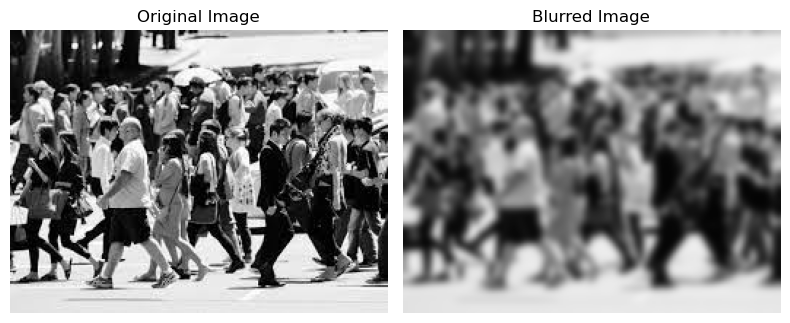

In [14]:


# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Apply a Gaussian blur (linear, position-invariant degradation)
    kernel_size = (15, 15)
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)

    # Display the original and blurred images
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    plt.title('Blurred Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


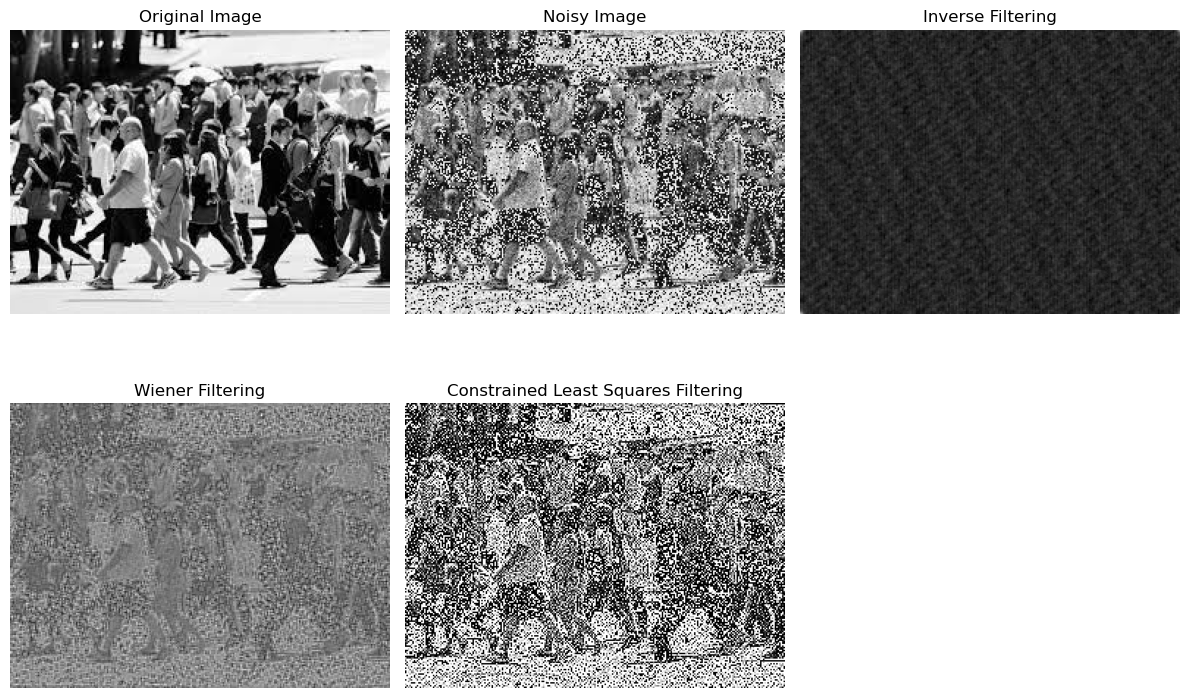

In [15]:

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Add white noise to the image
    noisy_image = image + np.random.normal(0, 25, image.shape).astype(np.uint8)

    # Perform Inverse Filtering
    fft_image = np.fft.fft2(image)
    fft_noisy_image = np.fft.fft2(noisy_image)
    inverted_fft = np.divide(fft_image, fft_noisy_image, out=np.zeros_like(fft_image), where=fft_noisy_image != 0)
    inverse_filtered_image = np.fft.ifft2(inverted_fft).real

    # Perform Wiener Filtering
    psf = np.ones((3, 3)) / 9  # Point spread function (e.g., average filter)
    psf_fft = np.fft.fft2(psf, s=image.shape)
    wiener_filter = np.conj(psf_fft) / (np.abs(psf_fft) ** 2 + 0.1)
    wiener_filtered_image = np.fft.ifft2(fft_noisy_image * wiener_filter).real

    # Perform Constrained Least Squares Filtering
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
    cls_filtered_image = cv2.filter2D(noisy_image, -1, kernel)

    # Display the images using Matplotlib
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(inverse_filtered_image, cmap='gray')
    plt.title('Inverse Filtering')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(wiener_filtered_image, cmap='gray')
    plt.title('Wiener Filtering')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(cls_filtered_image, cmap='gray')
    plt.title('Constrained Least Squares Filtering')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


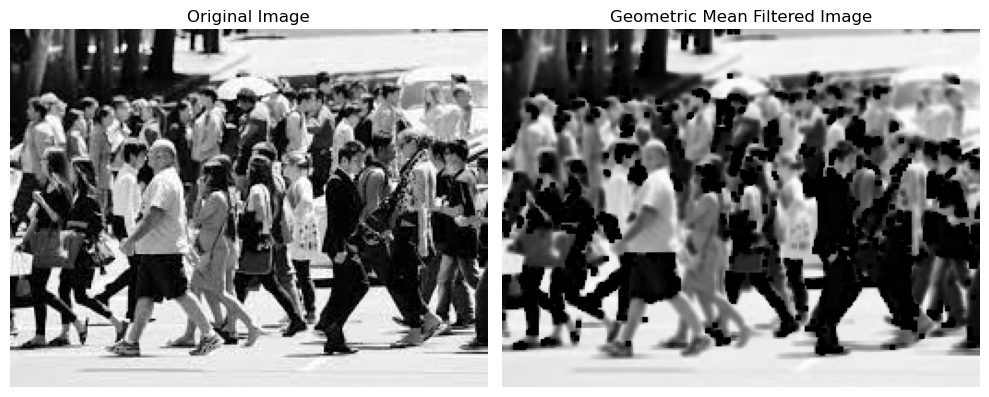

In [16]:
import cv2
import numpy as np
from scipy.ndimage import generic_filter

def geometric_mean_filter(image, size):
    def geometric_mean(window):
        return np.prod(window) ** (1.0 / len(window))

    filtered_image = generic_filter(image, geometric_mean, size=size)
    return filtered_image.astype(np.uint8)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Apply the geometric mean filter
    filtered_image = geometric_mean_filter(image, size=(3, 3))  # Adjust the filter size as needed

    # Display the images using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Geometric Mean Filtered Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


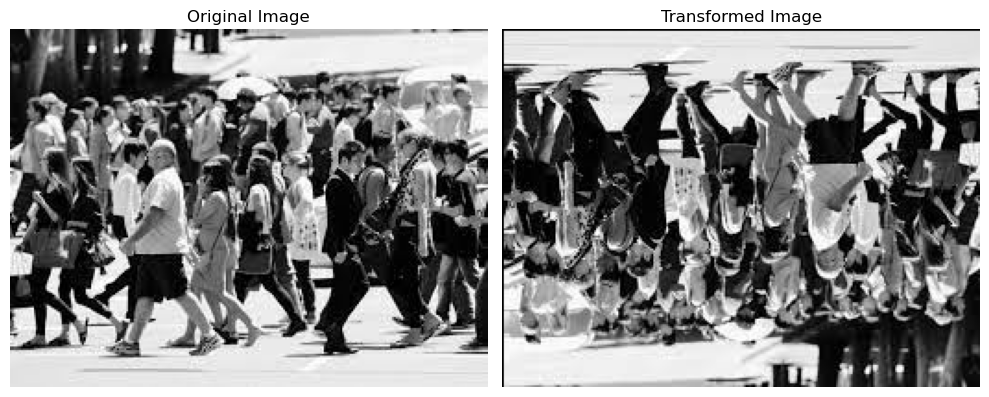

In [19]:


# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Define the transformation matrix (for example, a rotation of 30 degrees)
    rows, cols = image.shape[:2]
    angle = 180
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)

    # Apply the spatial transformation with bilinear interpolation
    transformed_image = cv2.warpAffine(image, rotation_matrix, (cols, rows), flags=cv2.INTER_LINEAR)

    # Display the original and transformed images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
    plt.title('Transformed Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
